Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

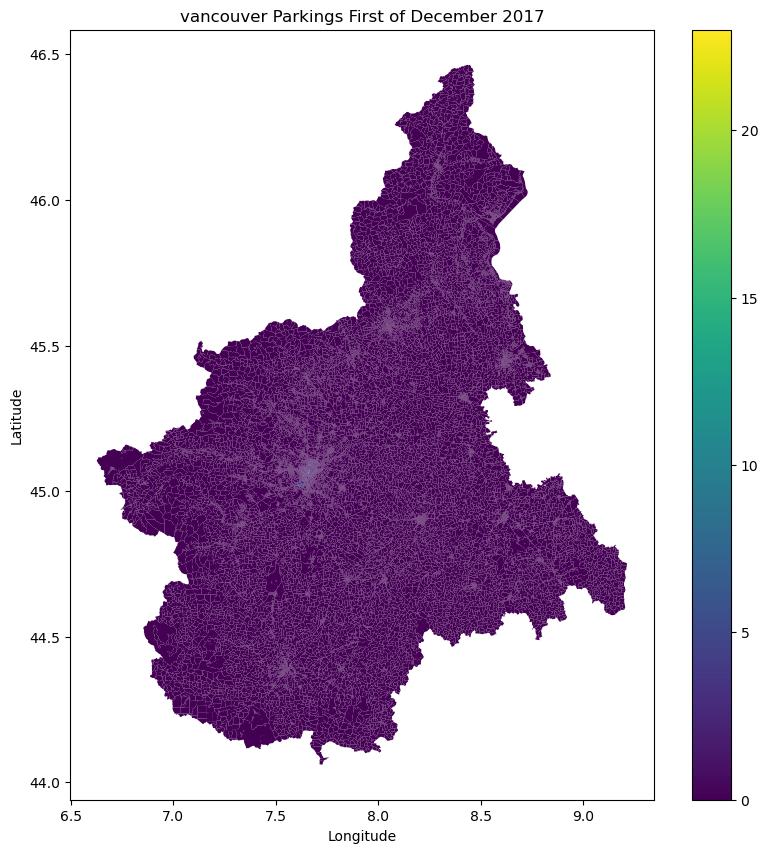

In [16]:
import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-12-01 00:00:00'
final_nov_c = '2017-12-2 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = enjoy_permenant_parking.find({"$and":[{"city":'Torino'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/R01_11_WGS84/R01_11_WGS84.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='viridis',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

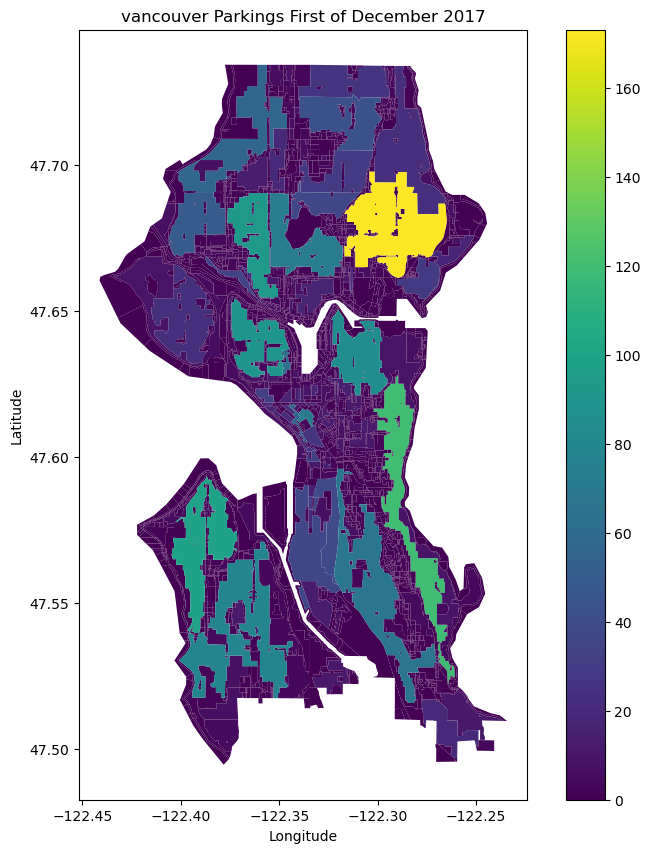

In [19]:
import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-12-01 00:00:00'
final_nov_c = '2017-12-2 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find({"$and":[{"city":'Seattle'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/Current_Land_Use_Zoning_Detail/DPD_ZONING_PV.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='viridis',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

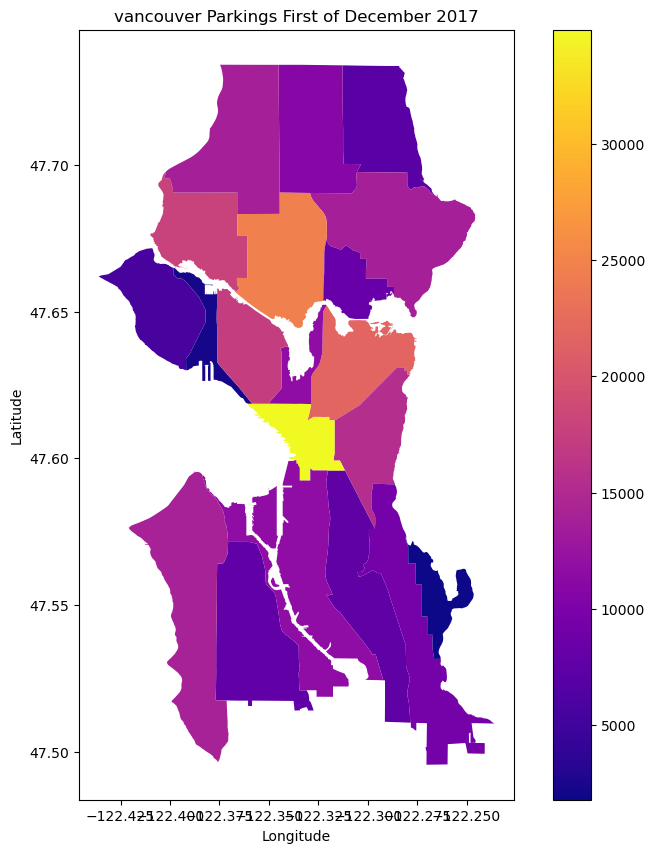

In [37]:
import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-11-01 00:00:00'
final_nov_c = '2018-01-31 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find({"$and":[{"city":'Seattle'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/Neighborhood_Map_Atlas_Districts/Neighborhood_Map_Atlas_Districts.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='plasma',legend = True,figsize=(10,10))
plt.xlabel('Longitude', rotation=60)
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

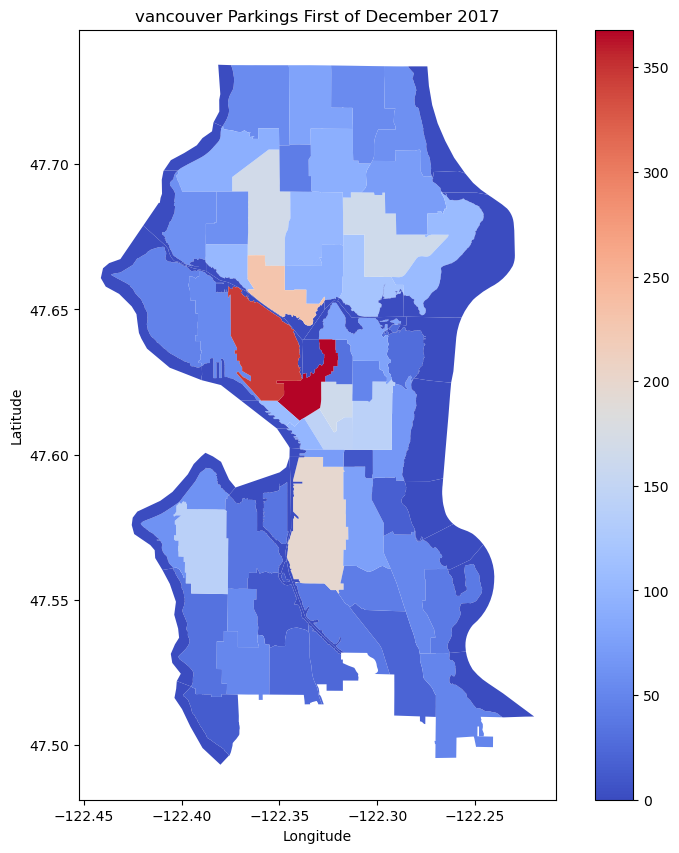

In [44]:
import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-12-01 00:00:00'
final_nov_c = '2017-12-2 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find({"$and":[{"city":'Seattle'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/Community_Reporting_Areas/CITYPLAN_CRA.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='coolwarm',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seattle Parkings Locations')

Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

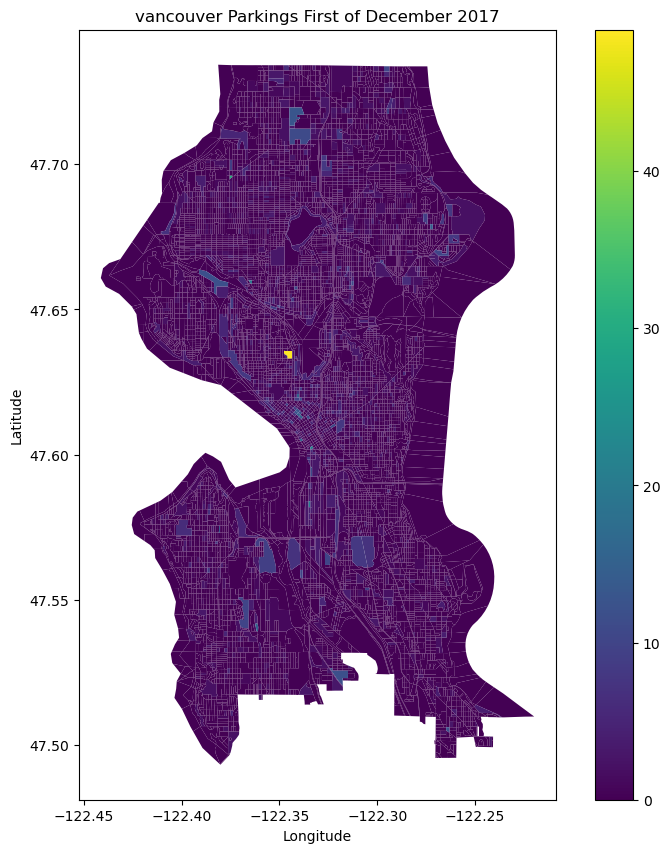

In [22]:

import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-12-01 00:00:00'
final_nov_c = '2017-12-2 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find({"$and":[{"city":'Seattle'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/2020_Census_Blocks_-_Seattle/2020_Census_Blocks_-_Seattle.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='viridis',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

Text(0.5, 1.0, 'vancouver Parkings First of December 2017')

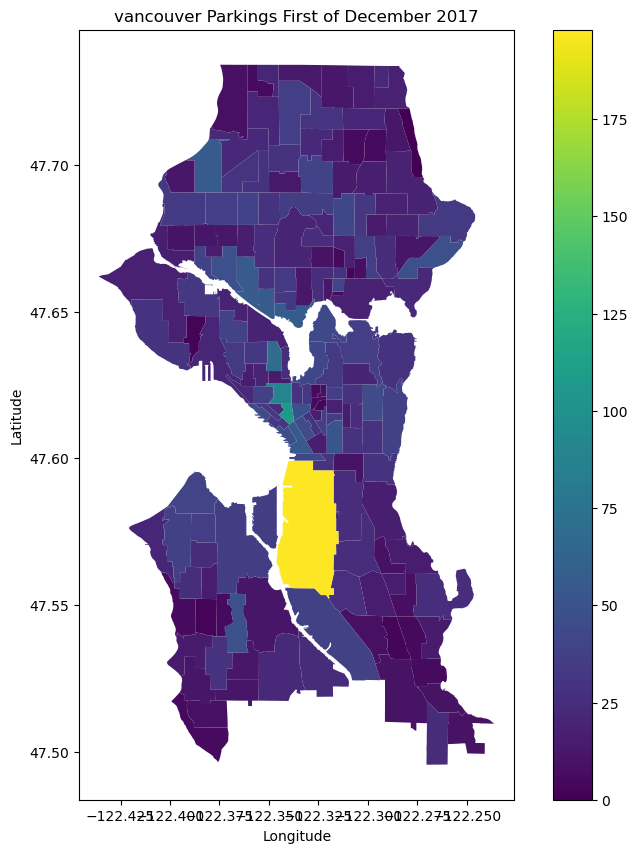

In [23]:


import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-12-01 00:00:00'
final_nov_c = '2017-12-2 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find({"$and":[{"city":'Seattle'}, 
                               {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
                               {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]}, 
                      {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/2020_Census_Tracts_-_Seattle/tract20_king_county.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='viridis',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

In [48]:
import time
import datetime
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 

client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']






tzVancouver=-8;  #Time zone shift for
time_week = 7*24*60*60
init_nov_c = '2017-11-01 00:00:00'
final_nov_c = '2018-01-31 00:00:00'
init_nov = (time.mktime(datetime.datetime.strptime(init_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))
final_nov = (time.mktime(datetime.datetime.strptime(final_nov_c,'%Y-%m-%d %H:%M:%S').timetuple()))

recorded = permenant_parking.find(
    {"$and":[{"city":'Seattle'}, 
             {"init_time":{"$gte":init_nov+tzVancouver*60*60}},
             {"init_time":{"$lte":final_nov+tzVancouver*60*60}}]},
    {'_id':1, 'city':1,'loc':1})
test = pd.DataFrame(recorded)
resultado = [d.get('coordinates') for d in test['loc']]
print(resultado[0])
parking = np.zeros((len(test),2))
for i in range (len(test)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

Vancouver_map = gpd.read_file(r'/Users/graybook/Downloads/Neighborhood_Map_Atlas_Neighborhoods/Neighborhood_Map_Atlas_Neighborhoods.shp')
Vancouver_map.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in Vancouver_map['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
Vancouver_map['counter']=counter

Vancouver_map.plot(column = 'counter',cmap='coolwarm',legend = True,figsize=(10,10))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vancouver Parkings First of December 2017')

[-122.32735, 47.54399]


Text(0.5, 1.0, 'Seattle Density HeatMap')

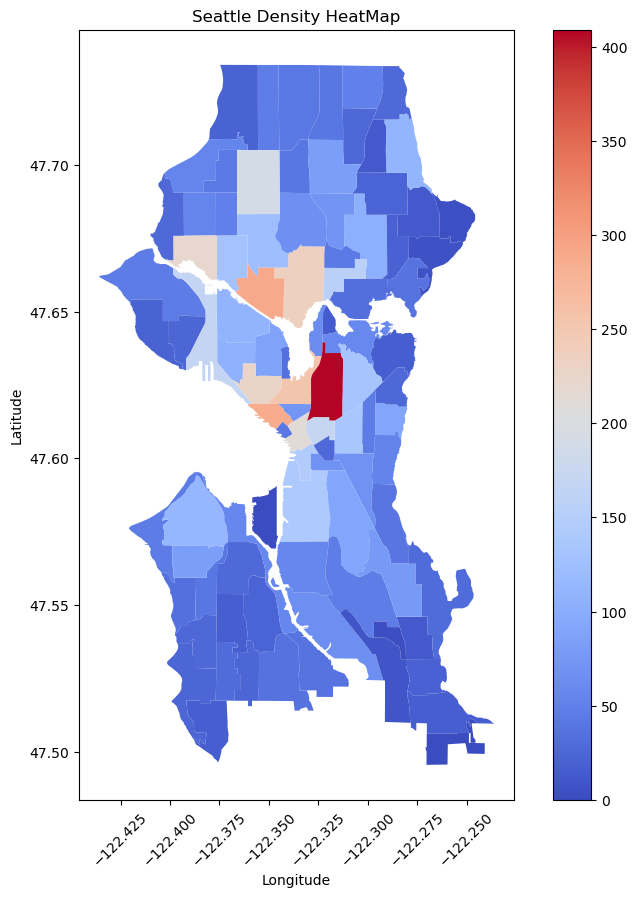

In [70]:
import time
from datetime import datetime, timezone
import pandas as pd
import pymongo as pm 
import pprint
import numpy as np
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
import matplotlib
import matplotlib.pyplot  as plt
#import MongoClient only 
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

booking_locations = list(permenant_booking.aggregate([
    {'$match': {'city': 'Seattle'}},
    {'$project': {
        '_id': 0,
        'duration': {'$divide': [{'$subtract': ['$final_time', '$init_time']}, 60]},
        'plate': 1,
        'city': 1,
        'init_time': 1,
        'init_date': 1,
        'year': {'$year': '$init_date'},
        'month': {'$month': '$init_date'},
        'day': {'$dayOfWeek': '$init_date'},
        'hour': {'$hour': '$init_date'},
        'origin_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 1]},
        'origin_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 0]},
        'dest_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 1]},
        'dest_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 0]}
    }},
    {'$match': {
        'duration': {'$gte': 5}, 
        'init_time': {'$gte': start_unix_time, '$lte': end_unix_time},
        # 'hour': {'$gte': 8, '$lt': 10},
        # 'day':{'$gte': 1, '$lte':7}
    }}
]))


my_pd = pd.DataFrame(booking_locations)
weekday = my_pd[(my_pd['day'] == 1) | (my_pd['day'] == 7)]
# weekday = my_pd[(my_pd['day'] > 1) & (my_pd['day'] < 7)]
weekday_morning = weekday[(weekday['hour'] >= 8) & (weekday['hour'] <= 10)]
longitude = weekday_morning['dest_longitude'].iloc[:]
latitude = weekday_morning['dest_latitude'].iloc[:]
fina_df = weekday_morning[['dest_latitude','dest_longitude']]
fin_final_df = fina_df.values.tolist()
# print(fin_final_df[0])


# test = pd.DataFrame(recorded)
# resultado = [d.get('coordinates') for d in test['loc']]
# print(resultado[0])
parking = np.zeros((len(fin_final_df),2))
for i in range (len(fin_final_df)):
    parking[i,1] = resultado[i][0]
    parking[i,0] = resultado[i][1]
    
parking_coordinates = pd.DataFrame(parking)
parking_coordinates.rename(columns={0:"latitude", 1:"longitude"}, inplace=True)
parking_coordinates.to_csv (r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv', index = False, header=True)

df = pd.read_csv(r'/Users/graybook/Downloads/Italy_shapefile/parkinggg.csv') 
geometry1 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]  

geo_df1 = gpd.GeoDataFrame(df, geometry=geometry1)

mymap = gpd.read_file(r'/Users/graybook/Downloads/Neighborhood_Map_Atlas_Neighborhoods/Neighborhood_Map_Atlas_Neighborhoods.shp')
mymap.to_crs(epsg = 4326 , inplace = True)
c=0
counter=[]
for i in mymap['geometry']:
    for j in geo_df1['geometry']:
        if i.contains(j):
            c+=1
    counter.append(c)
    c=0
mymap['counter']=counter

mymap.plot(column = 'counter',cmap='coolwarm',legend = True,figsize=(10,10))
plt.xticks(rotation=45)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seattle Density HeatMap')